# Regex

In [1]:
import pandas as pd 
import requests 
import io 
import zipfile 
from io import BytesIO
import os

myurl="https://www.forexite.com/free_forex_quotes/2011/11/011111.zip"

r = requests.get(myurl) 

dirForexite="data/raw/FX/intraday/forexite"
if not os.path.exists(dirForexite):
    os.makedirs("data/raw/FX/intraday/forexite")
    
myfile='data/raw/FX/intraday/forexite/011111.zip' 
open(myfile, 'wb').write(r.content) 

462284

In [2]:
FX=pd.read_csv(myfile)
FX  

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,EURUSD,20111101,100,1.3841,1.3842,1.3841,1.3841
1,EURUSD,20111101,200,1.3841,1.3841,1.3840,1.3840
2,EURUSD,20111101,300,1.3841,1.3841,1.3835,1.3836
3,EURUSD,20111101,400,1.3836,1.3836,1.3836,1.3836
4,EURUSD,20111101,500,1.3837,1.3837,1.3833,1.3835
...,...,...,...,...,...,...,...
73184,USXUSD,20111101,235600,77.3600,77.4200,77.3600,77.3900
73185,USXUSD,20111101,235700,77.3900,77.3900,77.3800,77.3800
73186,USXUSD,20111101,235800,77.3800,77.3900,77.3800,77.3900
73187,USXUSD,20111101,235900,77.4000,77.4200,77.4000,77.4200


In [3]:
FX=pd.read_csv(myfile)

import re
FX.columns=[re.sub("(<|>)","",mycol) for mycol in FX.columns]   # replaces < or > in the column names

In [4]:
FX["TIME"]=["%06d" % myval for myval in FX["TIME"].values.astype(int)]   # adds the padding 0s in the TIME column


In [5]:
FX

,TICKER,DTYYYYMMDD,TIME,OPEN,HIGH,LOW,CLOSE
0,EURUSD,20111101,000100,1.3841,1.3842,1.3841,1.3841
1,EURUSD,20111101,000200,1.3841,1.3841,1.3840,1.3840
2,EURUSD,20111101,000300,1.3841,1.3841,1.3835,1.3836
3,EURUSD,20111101,000400,1.3836,1.3836,1.3836,1.3836
4,EURUSD,20111101,000500,1.3837,1.3837,1.3833,1.3835
...,...,...,...,...,...,...,...
73184,USXUSD,20111101,235600,77.3600,77.4200,77.3600,77.3900
73185,USXUSD,20111101,235700,77.3900,77.3900,77.3800,77.3800
73186,USXUSD,20111101,235800,77.3800,77.3900,77.3800,77.3900
73187,USXUSD,20111101,235900,77.4000,77.4200,77.4000,77.4200


In [6]:
FX.index=pd.to_datetime(FX["DTYYYYMMDD"].map(str)+" "+FX["TIME"],
               format="%Y%m%d %H:%M:%S",
              utc=True)                              # converts the DTYYYYMMDD and TIME columns into datetime, and sets the index

# Categorical plots


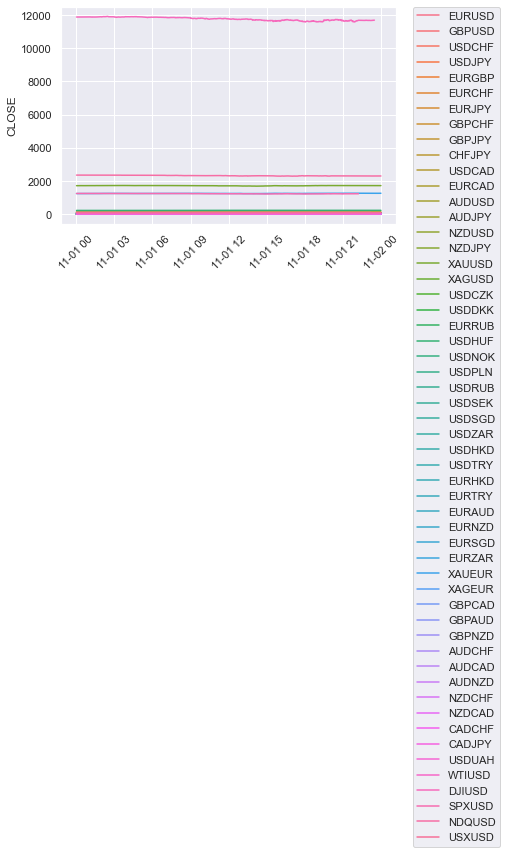

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters  # avoids a warning about timezones
register_matplotlib_converters()

sns.set()   # set default style

sns.lineplot(x=FX.index, y="CLOSE",  hue="TICKER",data=FX)   # one color (hue) per TICKER
plt.xticks(rotation=45) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # it is quite hard to see anything
plt.savefig("FX_notscaled.pdf")

In [9]:
normalize_price=lambda x: x/x.iloc[0]   # divides a vector by its first value
FX["normalized_close"]=FX[ ["TICKER","CLOSE"] ].groupby("TICKER").transform(normalize_price)   

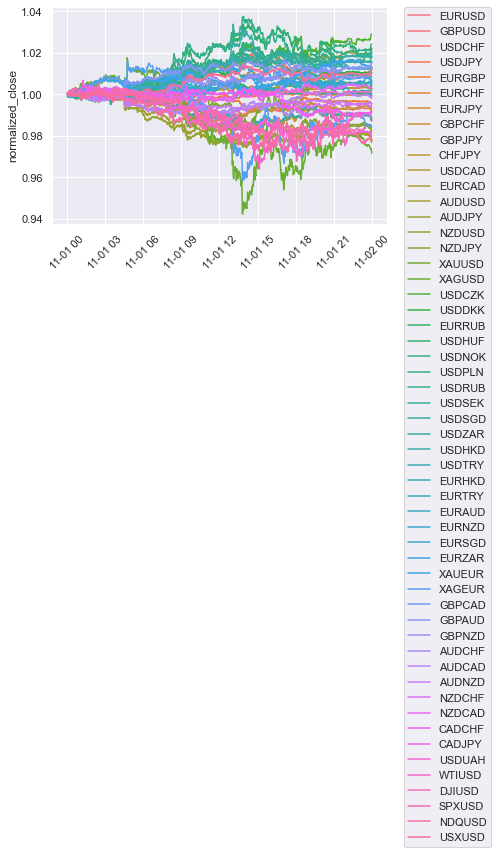

In [10]:
sns.lineplot(x=FX.index, y="normalized_close",hue="TICKER",data=FX)
plt.xticks(rotation=45) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [11]:
FX

,TICKER,DTYYYYMMDD,TIME,OPEN,HIGH,LOW,CLOSE,normalized_close
2011-11-01 00:01:00+00:00,EURUSD,20111101,000100,1.3841,1.3842,1.3841,1.3841,1.000000
2011-11-01 00:02:00+00:00,EURUSD,20111101,000200,1.3841,1.3841,1.3840,1.3840,0.999928
2011-11-01 00:03:00+00:00,EURUSD,20111101,000300,1.3841,1.3841,1.3835,1.3836,0.999639
2011-11-01 00:04:00+00:00,EURUSD,20111101,000400,1.3836,1.3836,1.3836,1.3836,0.999639
2011-11-01 00:05:00+00:00,EURUSD,20111101,000500,1.3837,1.3837,1.3833,1.3835,0.999567
...,...,...,...,...,...,...,...,...
2011-11-01 23:56:00+00:00,USXUSD,20111101,235600,77.3600,77.4200,77.3600,77.3900,1.011370
2011-11-01 23:57:00+00:00,USXUSD,20111101,235700,77.3900,77.3900,77.3800,77.3800,1.011239
2011-11-01 23:58:00+00:00,USXUSD,20111101,235800,77.3800,77.3900,77.3800,77.3900,1.011370
2011-11-01 23:59:00+00:00,USXUSD,20111101,235900,77.4000,77.4200,77.4000,77.4200,1.011762


<AxesSubplot:>

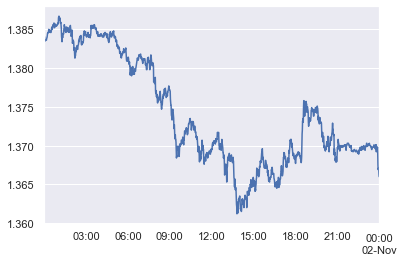

In [22]:
FX[FX.TICKER=="EURUSD"].CLOSE.plot()

In [25]:
FX[FX.TICKER=="EURUSD"].index[-1] - FX[FX.TICKER=="EURUSD"].index[0]

Timedelta('0 days 23:59:00')

In [27]:
FX[FX.TICKER=="EURUSD"]

,TICKER,DTYYYYMMDD,TIME,OPEN,HIGH,LOW,CLOSE,normalized_close
2011-11-01 00:01:00+00:00,EURUSD,20111101,000100,1.3841,1.3842,1.3841,1.3841,1.000000
2011-11-01 00:02:00+00:00,EURUSD,20111101,000200,1.3841,1.3841,1.3840,1.3840,0.999928
2011-11-01 00:03:00+00:00,EURUSD,20111101,000300,1.3841,1.3841,1.3835,1.3836,0.999639
2011-11-01 00:04:00+00:00,EURUSD,20111101,000400,1.3836,1.3836,1.3836,1.3836,0.999639
2011-11-01 00:05:00+00:00,EURUSD,20111101,000500,1.3837,1.3837,1.3833,1.3835,0.999567
...,...,...,...,...,...,...,...,...
2011-11-01 23:56:00+00:00,EURUSD,20111101,235600,1.3676,1.3676,1.3662,1.3669,0.987573
2011-11-01 23:57:00+00:00,EURUSD,20111101,235700,1.3670,1.3671,1.3668,1.3671,0.987718
2011-11-01 23:58:00+00:00,EURUSD,20111101,235800,1.3672,1.3672,1.3670,1.3670,0.987645
2011-11-01 23:59:00+00:00,EURUSD,20111101,235900,1.3669,1.3669,1.3663,1.3663,0.987140
